In [1]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression


# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

In [2]:
# Construct a tf.data.Dataset
data = pd.read_csv('abc.csv',
                   encoding='latin',
                   names = ['sentiment','id','date','query','user','text'])
#Encoding to use for UTF when reading/writing
#List of column names to use

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
data.shape

(1600000, 6)

In [5]:
data = data.sample(frac=1) 
# sample() is used to generate a sample random row or column from the function caller data frame.
# frac specifies the fraction of rows to return in the random sample, so frac=1 means return all rows (in random order).
data = data[:200000]
print("Dataset shape:", data.shape)

Dataset shape: (200000, 6)


In [6]:
data.head()

,sentiment,id,date,query,user,text
339498,0,2014653954,Wed Jun 03 02:14:37 PDT 2009,NO_QUERY,raniishere,im thinking about him
737864,0,2265335388,Sun Jun 21 06:21:04 PDT 2009,NO_QUERY,kurinaii,i caught him cheating..hmmmm http://plurk.com...
658689,0,2241671670,Fri Jun 19 11:14:09 PDT 2009,NO_QUERY,bsrome,@benpike that kinda makes me sad.. i thought t...
1374918,4,2051498850,Fri Jun 05 22:10:54 PDT 2009,NO_QUERY,natalia_oliver,at Mimi's Cafe with the most awesome 3-year ol...
451509,0,2069783795,Sun Jun 07 16:31:11 PDT 2009,NO_QUERY,sugarless5,my feet hurt so bad


In [7]:
data['sentiment'].unique()

array([0, 4], dtype=int64)

In [8]:
data['sentiment'].head()

339498     0
737864     0
658689     0
1374918    4
451509     0
Name: sentiment, dtype: int64

In [9]:
data['sentiment']=data['sentiment'].replace(4,1)

In [10]:
data['sentiment'].head()

339498     0
737864     0
658689     0
1374918    1
451509     0
Name: sentiment, dtype: int64

In [11]:
 #check the number of positive vs. negative tagged sentences
positives = data['sentiment'][data.sentiment == 1 ]
negatives = data['sentiment'][data.sentiment == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  99862
No. of negative tagged sentences is: 100138


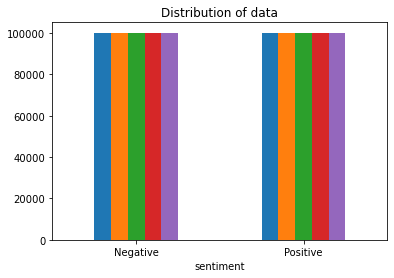

In [12]:
# Plotting the distribution for dataset.
ax = data.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(data['text']), list(data['sentiment'])

### Pandas apply()
It takes a function as an input & applies this function to an entire DataFrame.
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)[source]
0 or ‘index’: apply function to each column. 1 or ‘columns’: apply function to each row.


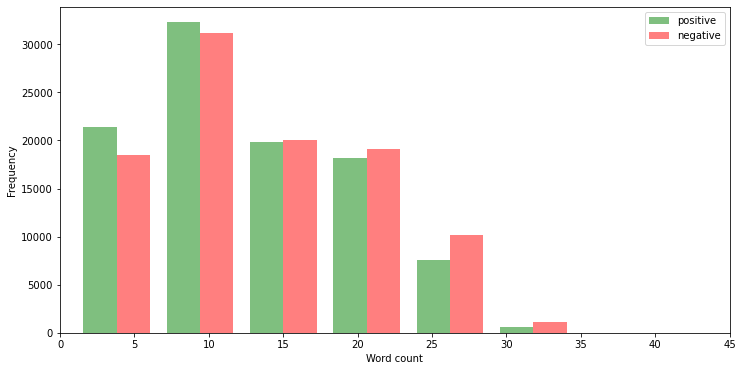

In [13]:
# get a word count per of text
def word_count(words):
    return len(words.split())

# plot word count distribution for both positive and negative 

data['word count'] = data['text'].apply(word_count) 
p = data['word count'][data.sentiment == 1]
n = data['word count'][data.sentiment == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

### Counter class
It is a special type of object data-set provided with the collections module in Python3. 
Collections module provides the user with specialized container datatypes,
providing an alternative to Python’s general purpose built-ins like dictionaries, lists and tuples.

Counter is a sub-class which is used to count hashable objects. It implicitly creates a hash table of an iterable when invoked.


In [14]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 64277),
 ('and', 36863),
 ('you', 29895),
 ('for', 26772),
 ('have', 17929),
 ('that', 16150),
 ("i'm", 16115),
 ('but', 15743),
 ('just', 15391),
 ('with', 14178),
 ('not', 12699),
 ('was', 12677),
 ('this', 11061),
 ('get', 10017),
 ('are', 9682),
 ('good', 9541),
 ('like', 9464),
 ('all', 9209),
 ('out', 8680),
 ('your', 8059)]

<AxesSubplot:xlabel='sentiment', ylabel='count'>

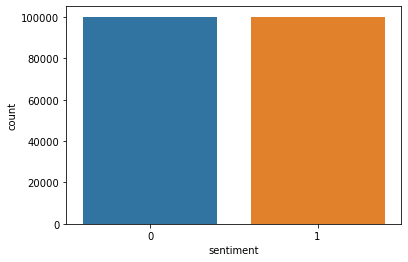

In [15]:
%matplotlib inline
sns.countplot(data['sentiment'])

In [16]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data.head(10)

,sentiment,text
339498,0,im thinking about him
737864,0,i caught him cheating..hmmmm http://plurk.com...
658689,0,@benpike that kinda makes me sad.. i thought t...
1374918,1,at Mimi's Cafe with the most awesome 3-year ol...
451509,0,my feet hurt so bad
226695,0,wishing i could sleep *tiiiiired* zzzzzzzzzz
626924,0,i miss all my chobots friends
519570,0,@Change_for_Iran http://iran.whyweprotest.net ...
475290,0,I think Tubby is all sad because he doesn't ha...
1128441,1,"@louisefury Flame and the Flower is so, so wro..."


In [17]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

sentiment    0.0
text         0.0
dtype: float64

In [18]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [19]:
#Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) 
#that a search engine has been programmed to ignore,
#both when indexing entries for searching and when retrieving them as the result of a search query.
#nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'down', "isn't", 'own', "you'll", 'so', 'yours', "couldn't", 'to', 'if', 'm', 'nor', 'whom', 'off', 'any', 'it', "didn't", 'these', 'into', 'some', 'then', 'until', 'through', 'only', "needn't", 'where', 'in', "don't", 'ma', 'herself', 'but', 'themselves', 'the', "you'd", 'no', 'or', 'himself', 'its', "you've", 'her', "mustn't", 'having', "hadn't", 'few', 'myself', 'about', 'being', 'between', 'his', 'theirs', 'ain', 'yourself', 'shan', 'now', "shouldn't", 'during', 'here', "wouldn't", 'didn', 'him', 'more', 'couldn', 'who', 'she', 're', 'why', 'isn', 'them', 'doing', 'all', 'they', 'll', 'each', 'y', 'above', 'mightn', 'you', 'mustn', 'for', 'at', 'won', 'a', 'is', 'hasn', 'wasn', 'over', "should've", 'from', "it's", "wasn't", "weren't", 'my', 'shouldn', 'itself', 'just', 'once', 'when', 'was', 'does', "won't", 'did', 'which', 'not', 'than', 'had', 'such', "shan't", 'been', 'up', 'ourselves', "she's", 'out', 'by', 'were', 'we', 'before', 'after', 'too', "hasn't", 'have', 't', 'd', 'm

In [20]:
#nltk.download('punkt')
#nltk.download('wordnet')

In [21]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
some = 'amp,today,tomorrow,going,girl'
def process_tweets(tweet):
  # Lower Casing
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)  
    
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"yrs", "years", tweet)
    tweet = re.sub(r"hrs", "hours", tweet)
    tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
    tweet = re.sub(r"2day", "today", tweet)
    tweet = re.sub(r"4got|4gotten", "forget", tweet)
    tweet = re.sub(r"b-day|bday", "b-day", tweet)
    tweet = re.sub(r"mother's", "mother", tweet)
    tweet = re.sub(r"mom's", "mom", tweet)
    tweet = re.sub(r"dad's", "dad", tweet)
    tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
    tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
    tweet = re.sub(r"thanx|thnx", "thanks", tweet)
    tweet = re.sub(r"goood", "good", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #remove some words
    tweet= re.sub(some,'',tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #tokens = [w for w in tokens if len(w)>2]
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [22]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [23]:
def convert_abbrev_in_text(tweet):
    t=[]
    words=tweet.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t)

In [24]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
data['processed_tweets'] = data['processed_tweets'].apply(lambda x: convert_abbrev_in_text(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [25]:
data=pd.read_csv('cleaned.csv')

In [26]:
from sklearn.utils import shuffle
data =  shuffle(data).reset_index(drop=True)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
data_train, data_test = train_test_split(data, test_size=0.1)
data = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
data.fit(data_train.text)
xtrain = data.transform(data_train.text)
xtest = data.transform(data_test.text)

model = LogisticRegression(max_iter=500)
model.fit(xtrain, data_train.sentiment)

LogisticRegression(max_iter=500)

In [28]:
from sklearn.metrics import accuracy_score, precision_score
preds = model.predict(xtest)

accuracy = accuracy_score(data_test.sentiment.values, preds)

print(f"Accuracy = {accuracy}")

Accuracy = 0.7889


Dataset is too big to be uploaded on github so I am sharing the link. 
https://www.kaggle.com/kazanova/sentiment140